<div width=50% style="display: block; margin: auto">
    <img src="figures/ucl-logo.svg" width=100%>
</div>

### [UCL-ELEC0135 Advanced Machine Learning Systems II - 2025]()
University College London
# Lab 1: Multi-Layer Perceptron


<hr width=70% style="float: left">

### Intended Learning Outcome
* Understand the concept of Feature Engineering, illustrated in the context of a facial recognition task.
* Create and train a Multi-Layer Perceptron (MLP) using Tensorflow Keras.
* Explore methodologies to improve a model's architecture to increase performances.

### Outline


This notebook has 3 parts:

0. [Setting up](#0.-Setting-up)
1. [Feature engineering  ](#1.-Feature-engineering)
2. [Define and train a multi-layer Perceptron](#2.-Define-and-train-a-multi-layer-Perceptron)
3. [Improving model performances](#3.-Improving-model-performances)

<hr width=70% style="float: left">

# 0. Setting up

## 0.1 Importing librairies

<div class="alert alert-block alert-danger">
<b>👩‍💻👨‍💻 Action required</b>

- Make sure you are running this Notebook in the kernel of the virtual environment you created for this module.
- Run the following cell. If some packages have not been installed, add them to the requirements.txt file, and run in terminal (after having activated the virtual environment you created) the command `pip install -r requirements.txt`. 

</div>

<div class="alert alert-block alert-info"> 
<b>💡 Tips</b> 

- Make sure to specify `numpy<2` in the `requirements.txt` file.

</div>

In [16]:
# TODO: run this cell and add packages as needed
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import os
from sklearn.model_selection import train_test_split # called scikit-learn when importing with pip (in requirements.txt)

In [17]:
# TODO: run this cell to import functions from utils.py
from utils import import_celeba_dataset
from utils import extract_features_from_images

## 0.2 Importing the data

<div class="alert alert-block alert-danger">
<b>👩‍💻👨‍💻 Action required</b>

- Use the function `import_celeba_dataset` contained in `utils.py` to import the dataset into Python.
- Using `plt.imshow`, display the images at index 0, 5 and 189 as well as their labels.
- Display the distribution of labels, is this dataset balanced?

</div>

Total number of images: 137


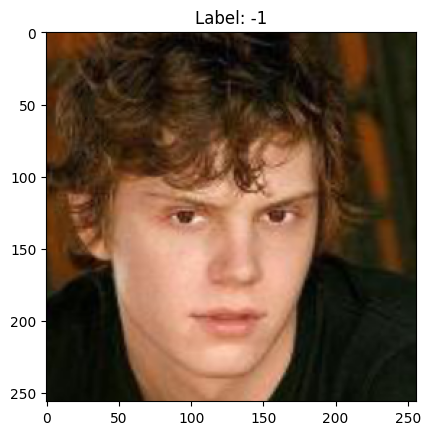

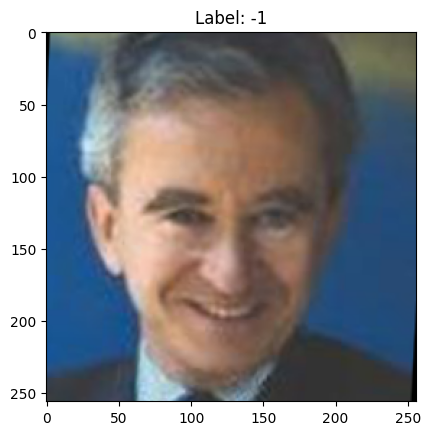

Index 189 is out of range.
Number of males: 67
Number of females: 70
Dataset is balanced: False


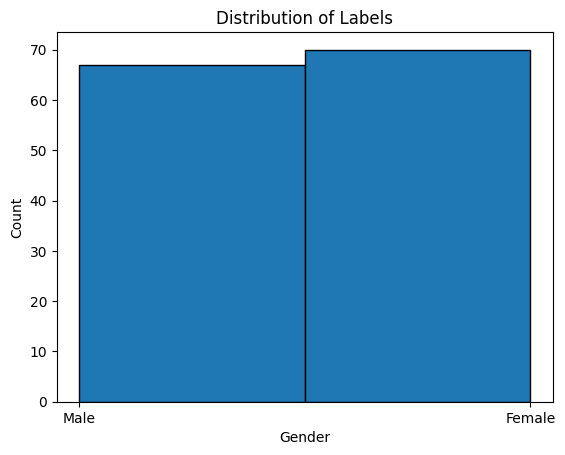

In [23]:
import numpy as np
from collections import Counter

# Import the dataset
images, labels = import_celeba_dataset()

# Check the length of the images list
print(f'Total number of images: {len(images)}')

# Display images at index 0, 5, and 189 along with their labels
indices = [0, 5, 189]
for i in indices:
    if i < len(images):
        plt.figure()
        plt.imshow(images[i].astype('uint8'))
        plt.title(f'Label: {labels[i]}')
        plt.show()
    else:
        print(f'Index {i} is out of range.')

labels = [0 if label == -1 else 1 for label in labels]
num_males = np.sum(np.array(labels) == 0)
num_females = np.sum(np.array(labels) == 1)

print(f'Number of males: {num_males}')
print(f'Number of females: {num_females}')
print(f'Dataset is balanced: {num_males == num_females}')

plt.figure()
plt.hist(labels, bins=2, edgecolor='black')
plt.xticks([0, 1], ['Male', 'Female'])
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Distribution of Labels')
plt.show()


# 1. Feature engineering  

In this task, we will explore the concept of feature engineering by extracting facial feature points from images using dlib, a powerful machine learning library. Feature engineering is a critical step in machine learning workflows, where raw data is transformed into meaningful features that enhance model performance. Here, we will leverage dlib's pre-trained facial landmark detection model to extract key points on the face, such as the eyes, nose, mouth, and jawline. These facial feature points (see image below) provide a compact and interpretable representation of the face, enabling our gender classifier to focus on meaningful geometric patterns while reducing the dimensionality of the input data.

![](figures/face_feature_extraction.png)

**Note:** in this lab, we are doing supervised feature extraction. Howerver, using Convolutional Neural Networks (CNNs), an architecture of models combining an MLP and convolutional layers, we could perform undupervised feature extraction, ie have the model learn what to extract from the image to get the best prediction performances.

<div class="alert alert-block alert-danger">
<b>👩‍💻👨‍💻 Action required</b>

- Use the function `extract_features_from_images` to extract the features that we will for our MLP.
- Verify that the features have correctly been extracted for all images in the dataset.
- If the feature extraction failed for some images, discard them from the dataset.

</div>

<div class="alert alert-block alert-info"> 
<b>💡 Tips</b> 

- You can run `help(extract_features_from_images)` in a Python cell to read the docstring of `extract_features_from_images`, which can help you understand what happends when feature extraction fails.
- If you discard some images, make sure to discard their associated label.

</div>


In [39]:
# TODO: your code goes here

# help(import_celeba_dataset)

# Extract features from images
features = extract_features_from_images(images)

# Verify that the features have been correctly extracted for all images
valid_features = []
valid_labels = []

for feature, label in zip(features, labels):
    if feature is not None:
        valid_features.append(feature)
        valid_labels.append(label)

# Convert valid features and labels to numpy arrays for further processing
X = np.array(valid_features)
y = np.array(valid_labels)

print(f'Number of valid features: {len(X)}')
print(f'Number of valid labels: {len(y)}')

# shape of the features
X.shape, y.shape

Number of valid features: 136
Number of valid labels: 136


((136, 68, 2), (136,))

In [28]:
# TODO: assuming that X and y are the features and labels, respectively, after preprocessing, then this cell should run without errors
assert len(X) == len(y) 

# 2. Define and train a multi-layer Perceptron

## 2.1 Train/test split

<div class="alert alert-block alert-danger">
<b>👩‍💻👨‍💻 Action required</b>

- Use the function [`train_test_split`](https://scikit-learn.org/1.5/modules/generated/sklearn.model_selection.train_test_split.html) to create a training set and a test set on which to train and evaluate the model respectively.
- Make sure that all the object you create (data and labels) are numpy objects.

</div>

In [40]:
from sklearn.model_selection import train_test_split

# First, split into training (80%) and test (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Further split the training set into training (70%) and validation (10%)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.125, random_state=42)
# 0.125 * 0.8 = 0.1, so validation set is 10% of the total data

# Ensure all datasets are NumPy arrays
X_train = np.array(X_train)
X_val = np.array(X_val)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_val = np.array(y_val)
y_test = np.array(y_test)

# Print dataset sizes
print(f'Training set size: {X_train.shape[0]}')
print(f'Validation set size: {X_val.shape[0]}')
print(f'Test set size: {X_test.shape[0]}')

Training set size: 94
Validation set size: 14
Test set size: 28


## 2.2 Defining the model

We are going to create a MLP with two hidden layers, with each layers containing 2048 neurons. In each layer, we will use the sigmoid activation function.

<div class="alert alert-block alert-danger">
<b>👩‍💻👨‍💻 Action required</b>

- Use the function defined below to create a baseline MLP.
- Use the [`tf.keras.model.summary()`](https://www.tensorflow.org/api_docs/python/tf/keras/Sequential#summary) to display your model's architecture.

</div>

In [31]:
# Define the MLP model
def create_baseline_mlp(n_neurons_layer1=2048, n_neurons_layer2=2048, learning_rate=0.00001,kernel_initializer=None):
    """
    Creates a baseline Multi-Layer Perceptron (MLP) model using TensorFlow Keras.

    Args:
        n_neurons_layer1 (int): Number of neurons in the first hidden layer. Defaults to 2048.
        n_neurons_layer2 (int): Number of neurons in the second hidden layer. Defaults to 2048.
        learning_rate (float): Learning rate for the Stochastic Gradient Descent optimizer. Defaults to 0.00001.
        kernel_initializer (str): Initializer for the kernel weights matrix. Defaults to 'glorot_uniform' which is the default initializer for the tf.keras.layers.Dense layer.

    Returns:
        tf.keras.Model: Compiled Keras model.
    """
    # If kernel_initializer is not provided, use the default initializer for tf.keras.layers.Dense layer
    if kernel_initializer is None:
        kernel_initializer = tf.keras.initializers.GlorotUniform() # Default initializer for tf.keras.layers.Dense layer

    model = tf.keras.Sequential([
        # Flatten the input (68x2 tensors) into a vector
        tf.keras.layers.Flatten(input_shape=(68, 2),
                                name = 'input_layer'),
        
        # First hidden layer with 2048 neurons and sigmoid activation
        tf.keras.layers.Dense(n_neurons_layer1, 
                              name = 'hidden_layer1',
                              activation='sigmoid',
                              use_bias=True,
                              kernel_initializer=kernel_initializer),
        
        # Second hidden layer with 2048 neurons and sigmoid activation
        tf.keras.layers.Dense(n_neurons_layer2, 
                              name = 'hidden_layer2',
                              activation='sigmoid',
                              use_bias=True,
                              kernel_initializer=kernel_initializer),
        
        # Output layer with 1 neuron (binary classification) and sigmoid activation
        tf.keras.layers.Dense(1, 
                              name = 'output_layer',
                              activation='sigmoid',
                              use_bias=True,
                              kernel_initializer=kernel_initializer) 
    ])
    
    # Compile the model
    model.compile(
        optimizer=tf.keras.optimizers.SGD(learning_rate=0.00001),  # Use Stochastic Gradient Descent with learning rate of 0.00001
        loss='binary_crossentropy',  # Binary classification loss function
        metrics=['accuracy']  # Metric to evaluate performance
    )
    
    return model

In [33]:
mlp_model = create_baseline_mlp()
mlp_model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (Flatten)           │ (None, 136)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer1 (Dense)           │ (None, 2048)           │       280,576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer2 (Dense)           │ (None, 2048)           │     4,196,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 1)              │         2,049 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,478,977 (17.09 MB)

 Trainable params: 4,478,977 (17.09 MB)

 Non-trainable params: 0 (0.00 B)

## 2.3 Train the model

<div class="alert alert-block alert-danger">
<b>👩‍💻👨‍💻 Action required</b>

- Use the function defined below to train a baseline MLP for 500 epochs.
- Plot the training and validation loss as a function of epochs.

</div>

In [38]:
def train_model(model,x_train,y_train,x_val,y_val, n_epochs=500):
    """
    Trains a given model on the provided training data and validates it on the provided validation data.

    Args:
        model (tf.keras.Model): Compiled Keras model.
        x_train (np.ndarray): Training features.
        y_train (np.ndarray): Training labels.
        x_val (np.ndarray): Validation features.
        y_val (np.ndarray): Validation labels.
        n_epochs (int): Number of epochs. Defaults to 500.

    Returns:
        tf.keras.History: Object that stores the training history.
    """
    # Train the model
    history = model.fit(
        x_train,                # Training features
        y_train,                # Training labels
        epochs= n_epochs,             # Number of epochs
        validation_data=(x_val, y_val),  # Validation data
        verbose=1               # Verbosity mode: 0 = silent, 1 = progress bar, 2 = one line per epoch
    )
    return history


Epoch 1/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.0000e+00 - loss: 0.1913 - val_accuracy: 0.0000e+00 - val_loss: 0.8301
Epoch 2/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.0000e+00 - loss: 0.1120 - val_accuracy: 0.0000e+00 - val_loss: 0.8312
Epoch 3/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.0000e+00 - loss: 0.3012 - val_accuracy: 0.0000e+00 - val_loss: 0.8323
Epoch 4/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.0000e+00 - loss: 0.1663 - val_accuracy: 0.0000e+00 - val_loss: 0.8334
Epoch 5/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.0000e+00 - loss: 0.2097 - val_accuracy: 0.0000e+00 - val_loss: 0.8345
Epoch 6/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.0000e+00 - loss: 0.0951 - val_accuracy: 0.0000e+00 - val_loss: 0.8356
Epoch 7/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.0000e+00 - loss: 0.1635 - val_accuracy: 0.0000e+00 - val_loss: 0.8367
Epoch 8/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 

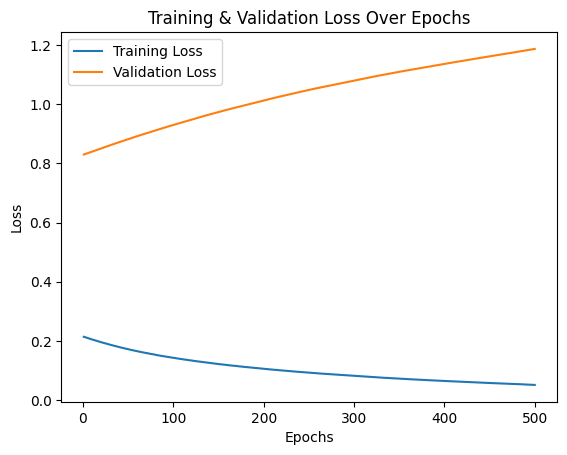

In [41]:
# TODO: your code goes here

# Train the model for 500 epochs
history = train_model(mlp_model, X_train, y_train, X_val, y_val, n_epochs=500)

# Extract loss values
train_loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(train_loss) + 1)

# Plot the training and validation loss
plt.figure()
plt.plot(epochs, train_loss, label='Training Loss')
plt.plot(epochs, val_loss, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training & Validation Loss Over Epochs')
plt.legend()
plt.show()

# 2.4 Averaging multiple models [Optional]

<div class="alert alert-block alert-info"> 
<b>💡 Tips</b> 

- **To minimize the variations introduced by the random weight innitialisation** and gain meaningful insight on the performance of a model, it is good practice to train a few models of identical architectures and train/test splits, but using different "seeds", and average their performances.

</div>

<div class="alert alert-block alert-warning"> 
<b>🦾 Optional</b>

- Instanciate multiple baseline MLPs using different seeds for the weight initialization, train them for the same number of epochs on the same train/test split data, and average their performance to get a evaluation of your model that is more independant of weight initizialisation.

</div>

In [ ]:
# TODO: your code goes here

# 3. Improving model performances

Now that we have defined, trained, and evaluated a model, we are going to explore different strategies for improving performances by modifying its architecture.

<div class="alert alert-block alert-success">
<b>🔬 Examples</b> 

Model performance metrics can include:
- Accuracy, F1 score...
- Model size
- Training time 
- Throughput
- Latency
</div>

<div class="alert alert-block alert-info"> 
<b>💡 Tips</b> 

- **To study the effects of changing a specific model parameter** to improve performances, you must start with a baseline model, and change parameters one at a time to study their effects independantly.

</div>

## 3.1 Increasing or decreasing the number of neurons in each layer.

<div class="alert alert-block alert-danger">
<b>👩‍💻👨‍💻 Action required</b>

- Using the code in task 2, create new models with the same number of layers (2 hidden layers) but change the number of neurons in each layers.
- Reflect on what happens to the model performances when you increase the number of neurons.
- Reflect on what happens to the model performances when you decrease the number of neurons.

</div>

In [ ]:
# TODO: your code here

def create_baseline_mlp(n_neurons_layer1=2048, n_neurons_layer2=2048, learning_rate=0.00001,kernel_initializer=None):



## 3.2 Increasing the number of layers

<div class="alert alert-block alert-danger">
<b>👩‍💻👨‍💻 Action required</b>

- Using the code in task 2, create new models with more hidden layers.
- Reflect on what happens to the prediction performances as you increase the depth of the model.
- Reflect on what happens to training time as you increase the depth of the model.
</div>

In [ ]:
# TODO: your code here

## 3.3 Changing weights initialisation

Using the code in task 2, create new models using the same architecture but with different initializers. 

<div class="alert alert-block alert-danger">
<b>👩‍💻👨‍💻 Action required</b>

- Using the code in task 2, create new models using the same architecture but with different initializers:
    - Glorot uniform initializer
    - Random uniform initializer
    - Constant initializer
    - Zero initializer
</div>

### 3.3.1 Glorot uniform initializer (default initializer)

The Glorot Uniform Initializer, also known as the Xavier Uniform Initializer, is a weight initialization method designed to maintain the variance of the activations across layers in a neural network. It dynamically calculates the range based on the number of input and output neurons, ensuring balanced signal propagation and better training stability. This helps prevent the issues of exploding or vanishing gradients during training.

Glorot uniform is commonly used for fully connected (dense) layers and convolutional layers in feedforward neural networks.
It works well with activation functions that are symmetric, such as tanh and sigmoid, and often works decently with ReLU.

**In TensorFlow and Keras, if no specific initializer is provided for a layer's weights, the framework defaults to using Glorot Uniform.**

Documentation: https://www.tensorflow.org/api_docs/python/tf/keras/initializers/GlorotUniform

In [ ]:
# TODO: your code here

### 3.3.2 Random uniform initializer

The Random Uniform initializer draws weights from a fixed uniform distribution with user-specified minimum and maximum values, without considering the architecture of the neural network. 

The Random Uniform initializer is not the default because its fixed range can lead to issues like exploding or vanishing gradients, especially in deep networks, whereas the Glorot Uniform initializer adapts to the network's structure and generally provides better convergence properties.

Documentation: https://www.tensorflow.org/api_docs/python/tf/keras/initializers/RandomUniform

In [ ]:
# TODO: your code here

### 3.3.3 Constant initializer 

The contant initialiser sets all the weights to the same value. Make sure to use an none-zero value.

Documentation: https://www.tensorflow.org/api_docs/python/tf/keras/initializers/Constant

In [ ]:
# TODO: your code here

### 3.3.4 Zero Initializer

Similar to the constant initializer, but with the value 0. 0 is a particular number since it is the [absorbant element](https://en.wikipedia.org/wiki/Absorbing_element) of multiplication. This is why we study this initialiser separatly from the constant initializer.

Documentation: https://www.tensorflow.org/api_docs/python/tf/keras/initializers/Zeros

In [ ]:
# TODO: your code here

## 3.4 Changing the learning rate

The learning rate is the parameter that is used to weight the gradients that are used to update the model's parametters. Setting it correctly is crutial to optimize the model's performances.

![](figures/lr-types.png)

### 3.4.1 Changing the value of the learning rate

In [ ]:
# TODO: your code here

### 3.4.2 Using an adaptive learning rate [Optional]

Previously, we were using the [Stochastic Gradient Descent (SGD) optimizer](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/SGD) which uses a fixed learning rate. However more advanced optimizers use **adaptive learning rates** which improve performances by dynamically calculating the learning rate at each epochs, to achieve the perfect balance between convergeance speed and overshoot minimisation.

![](figures/adaptative_LR.png)


<div class="alert alert-block alert-warning"> 
<b>🦾 Optional</b>

Try the following optimizers:
- [Adagrad](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/Adagrad): Adagrad adapts the learning rate for each parameter based on the sum of past squared gradients, allowing it to perform well with sparse data but potentially leading to overly small learning rates over time.
- [Adam](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/Adam): Adam combines the advantages of momentum and adaptive learning rates by maintaining running averages of both gradients and their squared values, resulting in fast convergence and robust performance across a wide range of tasks.

</div>

Fun fact: [ADAM: A METHOD FOR STOCHASTIC OPTIMIZATION](https://arxiv.org/abs/1412.6980) is the second most cited AI paper. (Source: https://www.doradolist.com/papers/21-most-cited-machine-learning-papers)

In [ ]:
# TODO: your code here

## 3.5 Create an optimized model [Optional]

<div class="alert alert-block alert-warning"> 
<b>🦾 Optional</b>

Using all the insights gained in task 3, change the parameters of the model defined in task 2 to optimize performances.

</div>

In [ ]:
# TODO: your code here